In [1]:
from Binaries import *

In [4]:
q_peak = np.array([GLOBAL.q_peak for _ in range(3)])
q_charge = np.array([GLOBAL.q_charge for _ in range(3)])

EventsADC = EventGenerator(["19_19.5"], real_background = False, sigma = 0, split = 1, apply_downsampling = True)
EventsADC.files = ["/cr/tempdata01/filip/QGSJET-II/COMPARE/ADC/" + file for file in os.listdir("/cr/tempdata01/filip/QGSJET-II/COMPARE/ADC")]
tracesADC = EventsADC.__getitem__(0)

q_peak = np.array([1, 1, 1])
q_charge = np.array([GLOBAL.q_charge / GLOBAL.q_peak for _ in range(3)])

EventsVEM = EventGenerator(["19_19.5"], real_background = False, sigma = 0, split = 1, q_peak = q_peak, q_charge = q_charge, apply_downsampling = True)
EventsVEM.files = ["/cr/tempdata01/filip/QGSJET-II/COMPARE/VEM/" + file for file in os.listdir("/cr/tempdata01/filip/QGSJET-II/COMPARE/VEM")]
tracesVEM = EventsVEM.__getitem__(0)
print(EventsVEM.files[0])

for trace in tracesADC:
    print(trace)

/cr/tempdata01/filip/QGSJET-II/COMPARE/VEM/DAT870126_00.csv
||                      S================S                            || 1.5818e+19 eV @ 234 m from core   
||                      S=============S                               || 1.5818e+19 eV @ 1193 m from core   
||                      S===============S                             || 1.5818e+19 eV @ 1368 m from core   
||                      S===========S                                 || 1.5818e+19 eV @ 1402 m from core   
||                      S============S                                || 1.5818e+19 eV @ 1661 m from core   
||                      S=====S                                       || 1.5818e+19 eV @ 1601 m from core   
||                      S=========S                                   || 1.5818e+19 eV @ 1615 m from core   
||                     SS                                             || 1.5818e+19 eV @ 3594 m from core   
||                     SS                                            

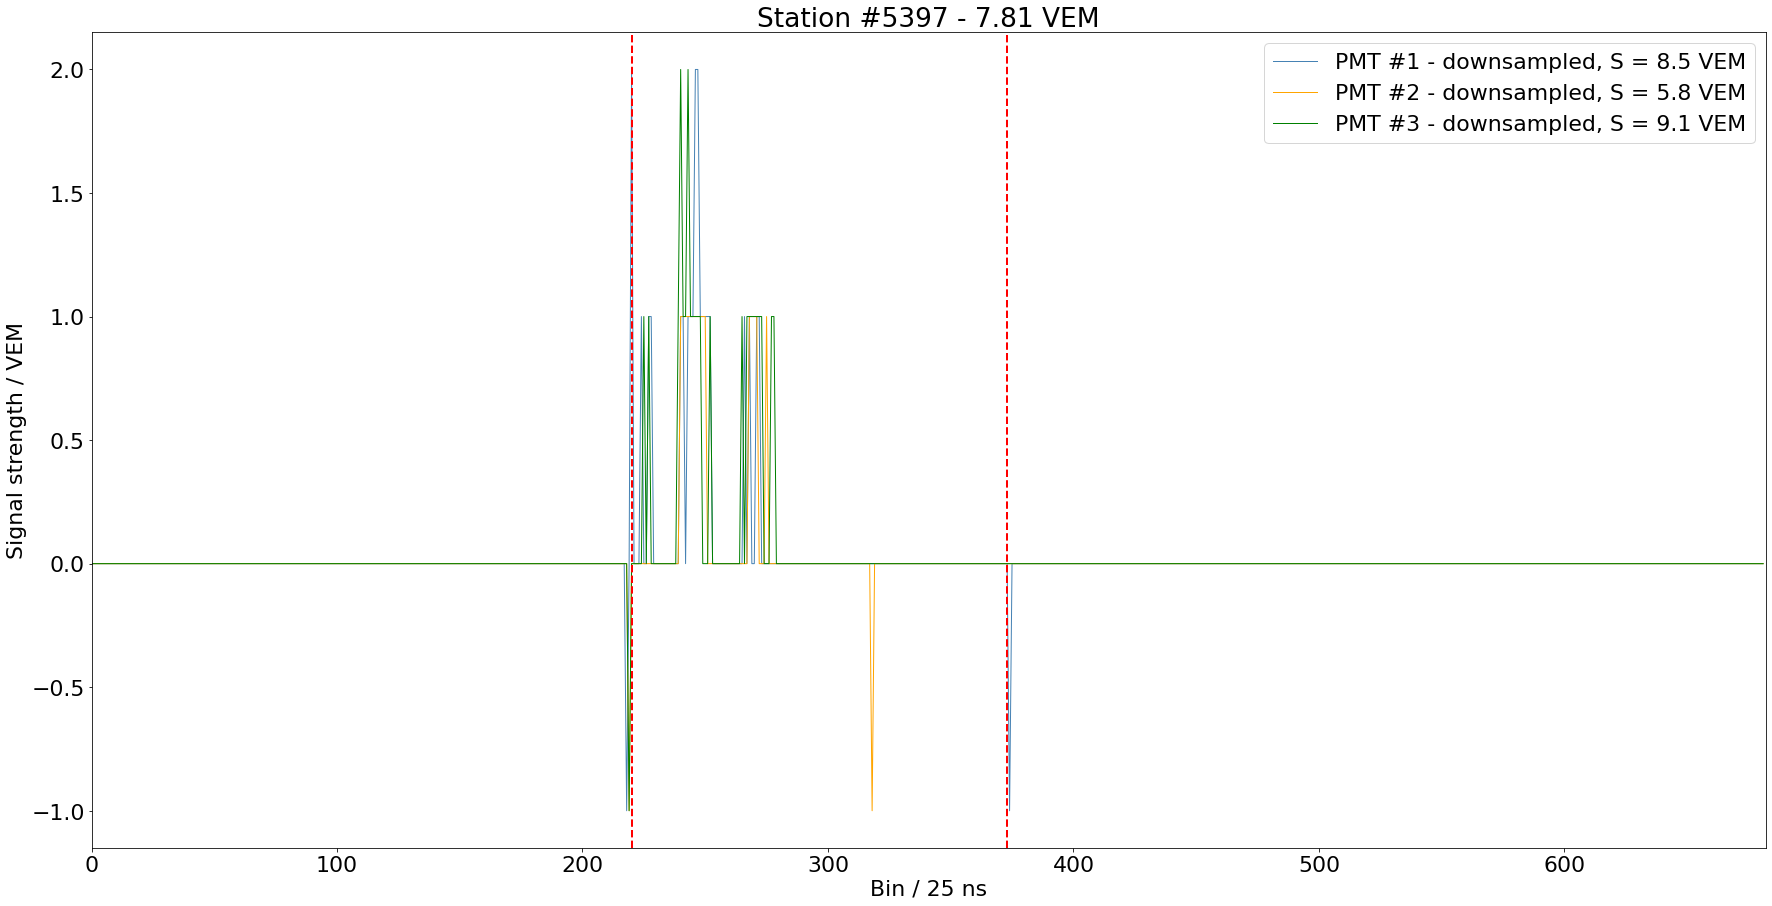

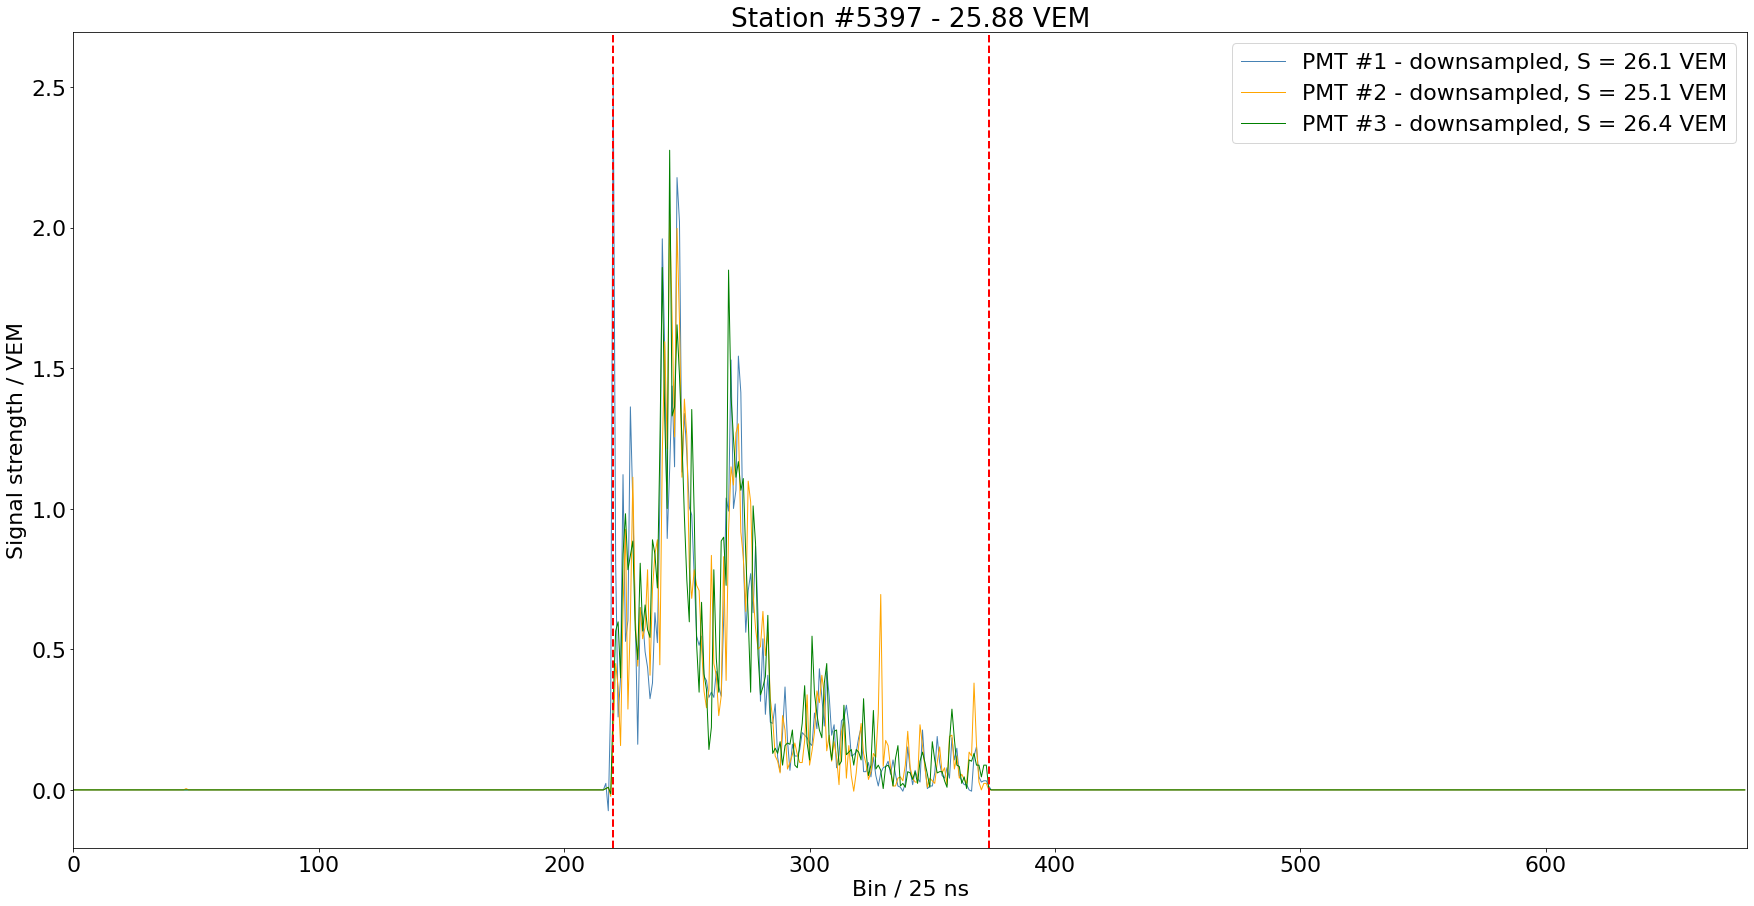

In [3]:
trace_idx = 1

vem_pmt = [tracesVEM[trace_idx].pmt_1, tracesVEM[trace_idx].pmt_2, tracesVEM[trace_idx].pmt_3]
adc_pmt = [tracesADC[trace_idx].pmt_1, tracesADC[trace_idx].pmt_2, tracesADC[trace_idx].pmt_3]
max_vem = max(max(tracesVEM[trace_idx].pmt_1), max(tracesVEM[trace_idx].pmt_2), max(tracesVEM[trace_idx].pmt_3))

ls = ["solid", "dashed", "dotted"]

# chargeVEM = np.mean(tracesVEM[trace_idx].deposited_signal)
# chargeADC = np.mean(tracesADC[trace_idx].deposited_signal)

tracesVEM[trace_idx].__plot__()
tracesADC[trace_idx].__plot__()

# for i in range(3):
#     plt.plot(range(2048), vem_pmt[i], c = "steelblue", ls = ls[i])
#     plt.plot(range(2048), adc_pmt[i], c = "orange", ls = ls[i])

# plt.plot([], [], ls = "solid", c = "steelblue", label = "recStation.GetVEMTrace(PMT)")
# plt.plot([], [], ls = "solid", c = "orange", label = r" $\Sigma_{{i}}\;\;\mathrm{ComponentVEM}_{i} \cdot q_\mathrm{Peak, i}$")
# plt.ylim(-0.05 * max_vem, 1.2 * max_vem)
# plt.legend()
# _ = plt.xlim(tracesVEM[trace_idx].signal_start, tracesVEM[trace_idx].signal_end)